# Data Preprocessing

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("dataset/shootings.csv")
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


## Age categories creation

Index(['0-18', '19-25', '26-35', '36-50', '51-75', '76+'], dtype='object', name='age')


[Text(0.5, 0, 'Age Category'), Text(0, 0.5, 'Number of individual')]

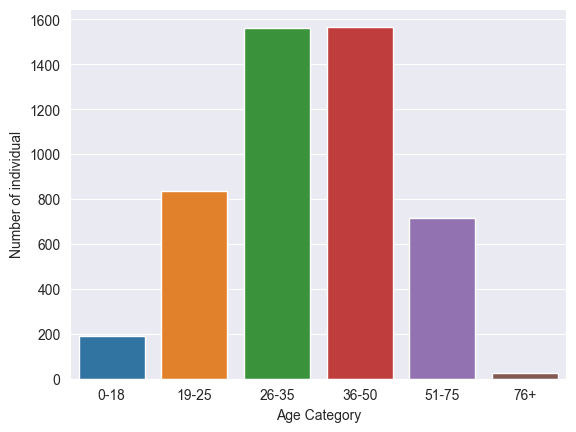

In [35]:
ageGpeCuts = [18, 25, 35, 50, 75, 99]
ageGpeName = ["0-18", "19-25", "26-35", "36-50", "51-75", "76+"]


def grouper(row):
    for i in range(len(ageGpeCuts) - 1):
        if int(row["age"]) <= ageGpeCuts[i]:
            row["age"] = ageGpeName[i]
            return row
    row["age"] = ageGpeName[-1]
    return row


dataProcessing = data.apply(grouper, axis=1)
# counting people in each group age
count = dataProcessing.groupby("age")["id"].nunique()
print(count.index)
ax = sns.barplot(x=count.index, y=count.values)
ax.set(xlabel='Age Category', ylabel='Number of individual')

## Bool to String

In [4]:
# changing bool of categories
def boolToString(row):
    for i in range(len(row)):
        if type(row.iloc[i]) == type(True):
            row.iloc[i] = "Yes" if row.iloc[i] else "No"
    return row

dataProcessing = dataProcessing.apply(boolToString, axis=1)
dataProcessing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,51-75,M,Asian,Shelton,WA,Yes,attack,Not fleeing,No,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,36-50,M,White,Aloha,OR,No,attack,Not fleeing,No,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,19-25,M,Hispanic,Wichita,KS,No,other,Not fleeing,No,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,26-35,M,White,San Francisco,CA,Yes,attack,Not fleeing,No,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,36-50,M,Hispanic,Evans,CO,No,attack,Not fleeing,No,Piercing objects


## State Grouping

In [5]:
# grouping by region divisions based on https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
# the structure is not optimized for assigning a region to a state code, but it's more readable this way
regionNameToStateCode = {
    "Pacific": ["AK", "WA", "OR", "CA", "HI"],
    "Mountain" : ["MT", "ID", "WY", "NV", "UT", "AZ", "NM", "CO"],
    "West North Central" : ["ND", "MN", "SD", "IA", "NE", "MO", "KS"],
    "East North Central" : ["WI", "MI", "IL", "IN", "OH"],
    "West South Central" : ["OK", "AR", "TX", "LA"],
    "East South Central" : ["KY", "TN", "MS", "AL"],
    "Middle Atlantic" : ["NY", "PA", "NJ"],
    "South Atlantic" : ["MD", "DE", "DC", "VA", "WV", "NC", "SC", "GA", "FL"],
    "New England" : ["ME", "VT", "NH", "MA", "CT", "RI"]
}

#processing state to region dict
stateToRegion = {}
for region,codes in regionNameToStateCode.items():
       for code in codes:
           stateToRegion[code] = region
print(len(dataProcessing.groupby("state")))
print(len(stateToRegion))
stateToRegion

51
51


{'AK': 'Pacific',
 'WA': 'Pacific',
 'OR': 'Pacific',
 'CA': 'Pacific',
 'HI': 'Pacific',
 'MT': 'Mountain',
 'ID': 'Mountain',
 'WY': 'Mountain',
 'NV': 'Mountain',
 'UT': 'Mountain',
 'AZ': 'Mountain',
 'NM': 'Mountain',
 'CO': 'Mountain',
 'ND': 'West North Central',
 'MN': 'West North Central',
 'SD': 'West North Central',
 'IA': 'West North Central',
 'NE': 'West North Central',
 'MO': 'West North Central',
 'KS': 'West North Central',
 'WI': 'East North Central',
 'MI': 'East North Central',
 'IL': 'East North Central',
 'IN': 'East North Central',
 'OH': 'East North Central',
 'OK': 'West South Central',
 'AR': 'West South Central',
 'TX': 'West South Central',
 'LA': 'West South Central',
 'KY': 'East South Central',
 'TN': 'East South Central',
 'MS': 'East South Central',
 'AL': 'East South Central',
 'NY': 'Middle Atlantic',
 'PA': 'Middle Atlantic',
 'NJ': 'Middle Atlantic',
 'MD': 'South Atlantic',
 'DE': 'South Atlantic',
 'DC': 'South Atlantic',
 'VA': 'South Atlantic',


In [6]:
def stateCodeToRegion(row):
    row["state"] = stateToRegion[row["state"]]
    return row

dataProcessing = dataProcessing.apply(stateCodeToRegion, axis=1)
dataProcessing = dataProcessing.rename(columns={'state': 'region'})
dataProcessing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,51-75,M,Asian,Shelton,Pacific,Yes,attack,Not fleeing,No,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,36-50,M,White,Aloha,Pacific,No,attack,Not fleeing,No,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,19-25,M,Hispanic,Wichita,West North Central,No,other,Not fleeing,No,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,26-35,M,White,San Francisco,Pacific,Yes,attack,Not fleeing,No,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,36-50,M,Hispanic,Evans,Mountain,No,attack,Not fleeing,No,Piercing objects


## Arms Category Grouping

In [37]:
armCategCount = dataProcessing.groupby("arms_category")["id"].nunique()
armCategCount

arms_category
Blunt instruments         122
Electrical devices         24
Explosives                  4
Guns                     2764
Hand tools                  1
Multiple                   54
Other unusual objects     192
Piercing objects           29
Sharp objects             818
Unarmed                   348
Unknown                   418
Vehicles                  121
Name: id, dtype: int64

In [38]:
# putting everything less than 100 cases in other weapons
def groupingArmsCateg(row):
    if armCategCount[row["arms_category"]] < 100:
        row["arms_category"] = "Other weapon objects"
    return row

dataProcessing = dataProcessing.apply(groupingArmsCateg, axis=1)
dataProcessing.groupby("arms_category")["id"].nunique()

arms_category
Blunt instruments         122
Guns                     2764
Other unusual objects     192
Other weapon objects      112
Sharp objects             818
Unarmed                   348
Unknown                   418
Vehicles                  121
Name: id, dtype: int64

## Dropping unusable columns

In [9]:
#removing columns not used for analysis (can change to test things out)
dataProcessing = dataProcessing.drop(columns=[
    "id",
    "name",
    "date",
    #"age",
    #"race",
    #"signs_of_mental_illness",
    #"body_camera",
    "armed",
    #"arms_category",
    "city",
    #"region",
    #"manner_of_death",
    #"gender",
    #"threat_level",
    #"flee"
])

## Saving modified dataset

In [10]:
dataProcessing.head()

,manner_of_death,age,gender,race,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,shot,51-75,M,Asian,Pacific,Yes,attack,Not fleeing,No,Guns
1,shot,36-50,M,White,Pacific,No,attack,Not fleeing,No,Guns
2,shot and Tasered,19-25,M,Hispanic,West North Central,No,other,Not fleeing,No,Unarmed
3,shot,26-35,M,White,Pacific,Yes,attack,Not fleeing,No,Other unusual objects
4,shot,36-50,M,Hispanic,Mountain,No,attack,Not fleeing,No,Other weapon objects


In [11]:
dataProcessing.to_csv("dataset/preprocessed-shootings.csv", index=False)